In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np
import math

In [51]:
digits = load_digits()
minibatchsize = 5
target_size = len(digits.target_names)
print(target_size)

X = np.array(digits.data)
y = np.array(digits.target)

# scaling the numbers
X = (X - np.min(X))/(np.max(X)-np.min(X))

# float 64 shoudl be fine aswell

print(X.dtype)

# encoding into one hot vectors
y = np.eye(target_size)[y]

# helper function to confirm correct splitting
def show_img(digits):
  plt.gray()
  plt.matshow(digits.reshape(8, 8))
  plt.show()

# yield X, y randomly
def shuffle_generator(X, y):
  shuffler = np.random.permutation(len(X))
  X = X[shuffler]
  y = y[shuffler]
  idx = 0
  while idx < len(X):
    yield(X[idx], y[idx])
    idx += 1

10
float64


In [52]:
# ACTIVATION FUNCTIONS
def sigmoid(input):
  return 1/(1 + np.exp(-input))

def sigmoid_backwards(input):
  return sigmoid(input) * (1 - sigmoid(input))

def softmax(input):
  sum = np.sum(np.exp(input))
  out = np.exp(input) / sum
  return out


# LOSS FUNCTION
def cross_entropy(predictions, targets):
  return -np.sum(targets * np.log(predictions + 10**-100))

def cross_entropy_backwards(predictions, targets):
  return predictions - targets


In [53]:
from typing import List

class MLP_layer():
  def __init__(self,units, input_size, activation_function, activation_function_backwards = 0):
    self.activation_function = activation_function
    self.activation_function_backwards = activation_function_backwards
    self.units = units
    self.input_size = input_size

    self.input = np.zeros(input_size)
    self.preactivation = np.zeros(units)
    self.activation = np.zeros(units)
    self.weights = np.random.normal(0, 0.2, size=(units, input_size))
    self.bias = np.zeros(units)

  def forward(self, input : np.ndarray):
    self.input = input
    self.preactivation = (self.weights @ input) + self.bias
    self.activation = self.activation_function(self.preactivation)
    return self.activation

  def backwards(self, error_signal):
    error_signal = error_signal * self.activation_function_backwards(self.preactivation) # dL/a * da/dpre
    dLdW = np.outer(error_signal, self.input)       # to adjust the weights                dL/dpre * dpre/dW
    dLdinput = error_signal @ self.weights # error signal for the next layer               dL/dpre * dpre/dinput
    return (dLdW, dLdinput)

  def backwards_output(self, targets):
    error_signal = cross_entropy_backwards(predictions=self.preactivation, targets=targets) #dL/dpre

    dLdW = np.outer(error_signal, self.input)       # to adjust the weights                          dL/dpre * dpre/dW
    dLdinput = self.weights.T @ error_signal # error signal for the next layer                dL/dpre * dpre/dinput
    return (dLdW, dLdinput)




In [54]:
class ANN():
  def __init__(self):
    self.layer1 = MLP_layer(32, 64, sigmoid, activation_function_backwards=sigmoid_backwards)
    self.layer2 = MLP_layer(16, 32, sigmoid, activation_function_backwards=sigmoid_backwards)
    self.layer3 = MLP_layer(10, 16, softmax)
    self.layers = [self.layer1, self.layer2, self.layer3]

    self.learning_rate = 0.1

  def forward(self, input):
    prediction = input
    for layer in self.layers:
      prediction = layer.forward(prediction)
    return prediction


  def backwards(self, targets):
    (dLdW, error_signal) = self.layers[-1].backwards_output(targets)
    self.layers[-1].weights -= self.learning_rate * dLdW
    for layer in reversed(self.layers[:-1]):
      (dLdW, error_signal) = layer.backwards(error_signal)
      layer.weights -= self.learning_rate * dLdW



In [55]:
ann = ANN()

def training(ANN, epochs=60):
  loss = []
  acc = []
  for i in range(epochs):
    # training and loss
    gen = shuffle_generator(X, y)
    avg_loss = []
    for (X_temp, y_temp) in gen:
      prediction = ANN.forward(X_temp)
      current_loss = cross_entropy(prediction, y_temp)
      avg_loss.append(current_loss)
      ANN.backwards(y_temp)
    loss.append(sum(avg_loss) / len(avg_loss))

    # accuracy
    gen = shuffle_generator(X, y)
    correct = 0
    total = 0
    for (X_temp, y_temp) in gen:
      total += 1
      prediction = ann.forward(X_temp)
      if np.argmax(prediction) == np.argmax(y_temp):
        correct += 1
    acc.append(correct/total)
  return ann, loss, acc

def plot_loss_epoch(avg_loss, accuracy):
  plt.plot([i for i in range(len(avg_loss))], avg_loss, label="avg_loss")
  plt.plot([i for i in range(len(avg_loss))], accuracy, label="accuracy")
  plt.xlabel("epoch")
  plt.ylabel("numeric value for avg_loss and accuracy")
  plt.legend()

In [56]:
ann, avg_loss, accuracy = training(ann)

[2.2014673612140507, 1.9718779635913872, 1.830161935140995, 1.7182212207093521, 1.645120709960044, 1.6138978717356127, 1.5972852331955283, 1.583247522736357, 1.572979860494333, 1.56435213852967, 1.5608860047057629, 1.5557952509169881, 1.5472566609791047, 1.5452535552581719, 1.5415098435419219, 1.538073544080282, 1.5343739583999605, 1.5314651724187573, 1.5291813359459911, 1.525491785231736, 1.5232324555717234, 1.5213393831682671, 1.51939353526649, 1.5167473798667883, 1.5148592578323057, 1.5136072966440797, 1.5122539942480107, 1.5087585452610264, 1.5082584904873932, 1.5075300207448126, 1.5046673396953112, 1.5043385543545964, 1.5029367750799951, 1.502399990923262, 1.5009158761095986, 1.4995403331779806, 1.4990246944567798, 1.497648790236017, 1.4969203003963985, 1.495842518624165, 1.4943625754614558, 1.4948937848315218, 1.493160809995315, 1.4933040325073563, 1.491814469263593, 1.4910350594082193, 1.491213047874364, 1.489760915718083, 1.4886263705953773, 1.4885837507745823, 1.48916498223835

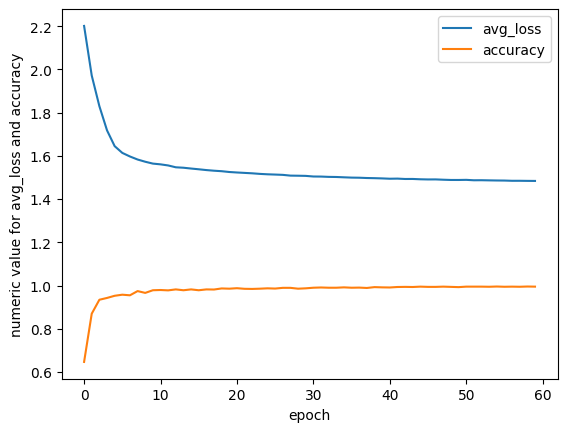

In [57]:
print(avg_loss)
print(accuracy)
plot_loss_epoch(avg_loss, accuracy)

[0.6466332776850306, 0.8697829716193656, 0.9343350027824151, 0.9426822481914302, 0.9526989426822482, 0.9577072899276572, 0.9549248747913188, 0.9744017807456873, 0.9660545353366722, 0.9782971619365609, 0.9794101279910963, 0.9777406789092933, 0.9821925431274346, 0.9782971619365609, 0.9821925431274346, 0.9782971619365609, 0.9821925431274346, 0.9816360601001669, 0.986644407345576, 0.9855314412910406, 0.9877573734001113, 0.9849749582637729, 0.9844184752365053, 0.9855314412910406, 0.9872008903728436, 0.9860879243183083, 0.9894268224819143, 0.9894268224819143, 0.9855314412910406, 0.9872008903728436, 0.989983305509182, 0.9910962715637173, 0.989983305509182, 0.989983305509182, 0.991652754590985, 0.989983305509182, 0.9905397885364496, 0.9888703394546466, 0.9927657206455203, 0.991652754590985, 0.9910962715637173, 0.993322203672788, 0.9938786867000556, 0.993322203672788, 0.994991652754591, 0.9938786867000556, 0.9938786867000556, 0.994991652754591, 0.9938786867000556, 0.9927657206455203, 0.99499165